In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

__Ответ__: 0.76342462

In [63]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])
y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [15]:
b1 = ((X[:,0] * y).mean() - X[:,0].mean() * y.mean()) / ((X[:,0] ** 2).mean() - (X[:,0].mean() ** 2))
b2 = ((X[:,1] * y).mean() - X[:,1].mean() * y.mean()) / ((X[:,1] ** 2).mean() - (X[:,1].mean() ** 2))
b3 = ((X[:,2] * y).mean() - X[:,2].mean() * y.mean()) / ((X[:,2] ** 2).mean() - (X[:,2].mean() ** 2))
b4 = ((X[:,3] * y).mean() - X[:,3].mean() * y.mean()) / ((X[:,3] ** 2).mean() - (X[:,3].mean() ** 2))

b1, b2, b3, b4

(0.799169372949684, 1.4003156134853607, 0.8033105791949314, 1.1783848740628342)

In [17]:
a1 = y.mean() - b1 * X.mean()
a2 = y.mean() - b2 * X.mean()
a3 = y.mean() - b3 * X.mean()
a4 = y.mean() - b4 * X.mean()
a1, a2, a3, a4

(7.290071381321261, 5.920927082625099, 7.280639551696321, 6.42638679624655)

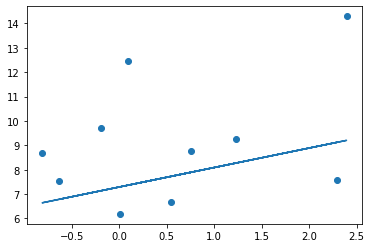

In [33]:
plt.scatter(X[:,0], y)
plt.plot(X[:,0], a1 + b1 * X[:,0])

In [34]:
mse1_ = np.sum(((a1 + b1 * X[:,0]) - y) ** 2 / 10)
mse1_

6.943562823335707

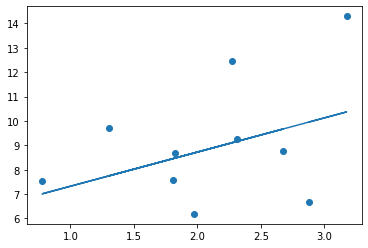

In [29]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], a2 + b2 * X[:,1])

In [36]:
mse2_ = np.sum(((a2 + b2 * X[:,1]) - y) ** 2 / 10)
mse2_

4.930461442795658

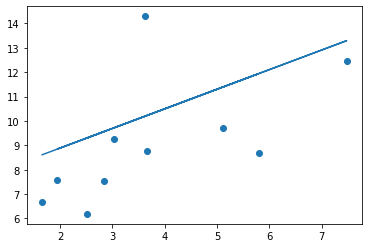

In [30]:
plt.scatter(X[:,2], y)
plt.plot(X[:,2], a3 + b3 * X[:,2])

In [37]:
mse3_ = np.sum(((a3 + b3 * X[:,2]) - y) ** 2 / 10)
mse3_

5.2567246085300505

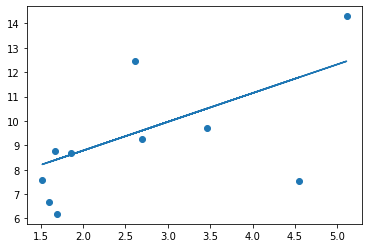

In [31]:
plt.scatter(X[:,3], y)
plt.plot(X[:,3], a4 + b4 * X[:,3])

In [38]:
mse4_ = np.sum(((a4 + b4 * X[:,3]) - y) ** 2 / 10)
mse4_

3.9091060313014205

In [39]:
mse1_, mse2_, mse3_, mse4_

(6.943562823335707, 4.930461442795658, 5.2567246085300505, 3.9091060313014205)

In [49]:
def sum_of_squares(samples: np.ndarray) -> float:
    """Сумма квадратов отклонений."""
    return ((samples - samples.mean()) ** 2).sum()

In [57]:
#R1 = 1 - sum_of_squares(X[:,0]) / sum_of_squares(y)
#R2 = 1 - sum_of_squares(X[:,1]) / sum_of_squares(y)
#R3 = 1 - sum_of_squares(X[:,2]) / sum_of_squares(y)
#R4 = 1 - sum_of_squares(X[:,3]) / sum_of_squares(y)
R1 = 1 - mse1_ / sum_of_squares(y)
R2 = 1 - mse2_ / sum_of_squares(y)
R3 = 1 - mse3_ / sum_of_squares(y)
R4 = 1 - mse4_ / sum_of_squares(y)
R1, R2, R3, R4

(0.880183133826423, 0.9149208477123522, 0.909290909442796, 0.9325451722512456)

__Задача 2__

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

__Ответ__: 1

In [64]:
n = X.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [65]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

(0.0, 0.5)

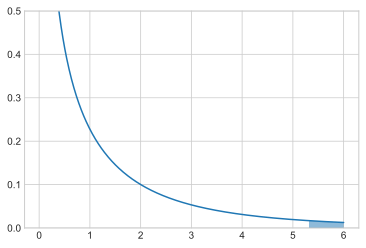

In [66]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

plt.ylim(0, 0.5)

In [68]:
F1 = (R1 / k1) / ((1 - R1) / k2)
F2 = (R2 / k1) / ((1 - R2) / k2)
F3 = (R3 / k1) / ((1 - R3) / k2)
F4 = (R4 / k1) / ((1 - R4) / k2)
F1, F2, F3, F4

(58.768563187176944, 86.03008592460405, 80.19402720122025, 110.5978864225581)

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

__Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.

__Ответ__: 0

In [3]:
y1 = np.zeros(2509)
y1[np.arange(77)] = 1
y2 = np.zeros(1465)
y2[np.arange(60)] = 1

In [4]:
y = np.concatenate([y1, y2])

n1 = y1.shape[0]
n2 = y2.shape[0]
n = n1+n2

y1_mean = y1.mean()
y2_mean = y2.mean()
y_mean = y.mean()

In [5]:
SSb = n1*(y1_mean - y_mean)**2 + n2*(y2_mean - y_mean)**2
SSw = ((y1 - y1_mean)**2).sum() + ((y2 - y2_mean)**2).sum()

In [6]:
k = 2
k1 = k-1
k2 = n-k
sigma2b = SSb/k1
sigma2w = SSw/k2

F = sigma2b/sigma2w

In [8]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
print("Ответ: ",int(F>=t))

Ответ:  0
